                                            Unsupervised learning
                            
                            
                            
                            
                            
                      Unsupervised learning is a type of machine learning that looks for 
                       previously undetected patterns in a data set with no pre-existing 
                            labels and with a minimum of human supervision.
             
             
             
          


# K-Means Clustering

    

- We place K centroids at random in the dataset.
  - (These are the barycenters of future clusters)

Each point in the Dataset is assigned to the nearest centroid cluster.

The centroid is moved to the middle of the cluster. (where is the average of the points)

- K-Means is an iterative algorithm that works in 2 steps:

    - 1: Allocation of points to the nearest center

    - 2: Displacement of the center at the cluster average

Depending on the initial position of the K-Mean centroids can give bad clusters.

- Solution : 

    - We execute K-Mean with different starting positions.

    - Solution adopted is that which minimizes the sum of the distances between the points (x) of a cluster and its center (my)

# K-Means Clustering : 
  - K-Mean seeks the position of the centers which minimizes the distance between the points of a cluster and the centroid.

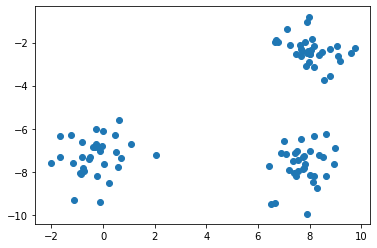

In [32]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate isotropic Gaussian blobs for clustering.

X,y=make_blobs(n_samples=100,centers=3,cluster_std=0.8)
plt.scatter(X[:,0],X[:,1])

In [1]:
from sklearn.cluster import KMeans

- n_clusters : Number of cluster we want.
- n_init: Number of time we want this algorithm to be executed.
- max_iter : Maximum number of iteration
- init: Initialisation Strategy ( Default : K-Means++ , our centroide point will be fare from our data to make them converge easier.)



In [33]:
model=KMeans(n_clusters=3)
model.fit(X)
model.labels_

array([0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0,
       1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0,
       0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2])

In [34]:
model.predict(X)

array([0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0,
       1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0,
       0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2])

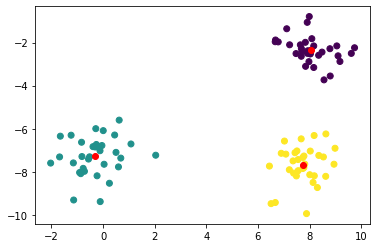

In [38]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')


In [36]:
# 2 centroides and 2 Variables

model.cluster_centers_

array([[ 8.06915207, -2.34898052],
       [-0.31813887, -7.25928272],
       [ 7.74216919, -7.68072981]])

In [39]:
model.inertia_

114.70161533914423

In [40]:
model.score(X)

-114.7016153391444

- DataSet With a lot of dimensions. 
- How do we find n_clusters ?

In [45]:
inertia=[]
k_range = range(1,20)
for k in k_range:
    model=KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Cost of the model(inertia)')

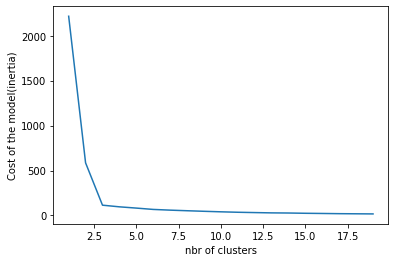

In [131]:
plt.plot(k_range,inertia)
plt.xlabel('nbr of clusters')
plt.ylabel('Cost of the model(inertia)')

# Anomaly Detection


# IsolationForest

- IsolationForest:Isolation forest is an unsupervised learning algorithm for anomaly detection that works on the principle of isolating anomalies.

- An anomaly point should be isolat from others so to find them we use a 'split line'.

- Low number of splits = Hight anomalie probability


In [56]:
import numpy as np
X,y=make_blobs(n_samples=50,centers=1,cluster_std=0.8)
X[-1,:]=np.array([2.25,5])

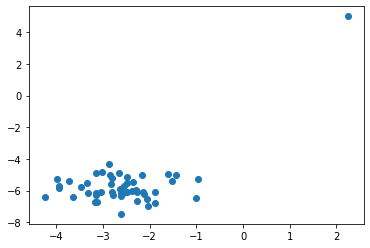

In [59]:
plt.scatter(X[:,0],X[:,1])

In [57]:
from sklearn.ensemble import IsolationForest
#contamination=0.01: There is 1% of contamination in my data set
model=IsolationForest(contamination=0.01)

In [58]:
model.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

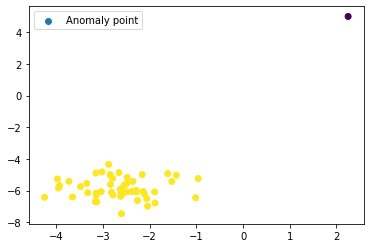

In [65]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X),label='Anomaly point')
plt.legend()

# Exemple:
    - Application Decontamination Digit

In [66]:
from sklearn.datasets import load_digits

In [67]:
digits=load_digits()
images=digits.images
X=digits.data
y=digits.target

print(X.shape)

(1797, 64)


- There is 1797 images of numbers going from 0 to 9.
- Images of 64 pixels.
- There should be badly written numbers , lets find which one.
 

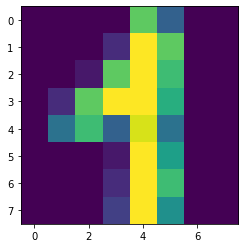

In [73]:
plt.imshow(images[42])

In [74]:
model = IsolationForest(random_state=0,contamination=0.02)

In [76]:
model.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.02,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [77]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

- 1 represent Normal Datas
- -1 represent Anomalies Datas

Lets see Anomaly :

In [78]:
outliers = model.predict(X) == -1

In [80]:
#False fo Normal
#Thrue for == -1 , meaning for Anomalies.
outliers

array([False, False, False, ..., False, False, False])

In [82]:
images[outliers][0]

array([[ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16., 16., 12.,  0.],
       [ 0.,  0.,  0.,  8., 14., 16., 12.,  0.],
       [ 0.,  0.,  0.,  5., 10., 16.,  6.,  0.],
       [ 0.,  1.,  7., 11., 16., 13.,  0.,  0.],
       [ 0.,  9., 16., 16., 14.,  1.,  0.,  0.],
       [ 0.,  3.,  8., 14., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 16., 12.,  0.]])

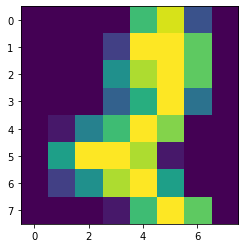

In [83]:
plt.imshow(images[outliers][0])

Text(0.5, 1.0, '2')

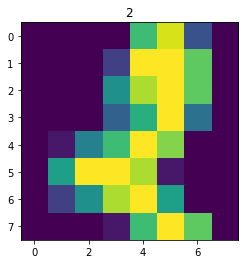

In [86]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

- It is a 2. 

# Local Outlier Factor

- Outlier Detection Vs Novelty Detection
   
   - Outlier Detection:
        - Detect anomalies in the Train Set. (Isolation Forest)
   
   - Novelty Detection :
        - Detect anomalies in Test Set , future Datas. (Local Outlier Factor)

# Dimensionality Reduction


- The principle is to reduce the unnecessary complexity of a dataset by projecting its data in a smaller space (a space with fewer variables)

  -- Speed ​​up the machine learning

  -- Fight against the scourge of dimension (risk of overfitting linked to excess dimensions)

# Principal component analysis , PCA


- The goal is to project our data on axes called principal components while seeking to minimize the distance between our points and their projections.

- In this way we reduce the size of our dataset while preserving as much as possible the variance of our data.

In [ ]:
FIRST OF ALL : 
    - StandardScaler before using PCA (Standardisation of our data)
    - For continuous variable
    - Need Linearity in our Datas . 

- PCA is a Transformer:

    - Define the number of components.
    - Transform the data with fit_transform()

In [92]:
from sklearn.decomposition import PCA

# n_components : 
 #Number of dimension in which we want to project our data.
model=PCA(n_components=10)
#Transform our Data.
model.fit_transform(X)

array([[ -1.25945398,  21.27489098,  -9.4629542 , ...,   2.55407288,
         -0.58276953,   3.62398146],
       [  7.95767819, -20.76870657,   4.43969869, ...,  -4.61546553,
          3.57718403,  -1.05050427],
       [  6.99191376,  -9.95599843,   2.95855081, ..., -16.42758094,
          0.7232689 ,   4.21925529],
       ...,
       [ 10.80121139,  -6.96023387,   5.59943274, ...,  -7.4083536 ,
         -3.9531397 , -13.08177263],
       [ -4.87205724,  12.42394497, -10.17072272, ...,  -4.3582319 ,
          3.93159663, -13.14295924],
       [ -0.34444071,   6.3655527 ,  10.77362667, ...,   0.67129379,
         -4.10866027, -12.58609192]])

# n_components : 
 - Number of dimension in which we want to project our data.

# 1. Data visualization : 


 - we project our dataset in a 2D or 3D space.n_components= 2 or 2.

In [94]:
from sklearn.decomposition import PCA

In [95]:
X.shape

(1797, 64)

In [96]:
model=PCA(n_components=2)
model.fit_transform(X)

array([[ -1.2594666 ,  21.27488299],
       [  7.95760438, -20.76870164],
       [  6.99192745,  -9.95598444],
       ...,
       [ 10.8012893 ,  -6.96025103],
       [ -4.87211065,  12.42395309],
       [ -0.34437918,   6.36555236]])

In [99]:
model.fit_transform(X).shape

(1797, 2)

In [97]:
X_reduced = model.fit_transform(X)

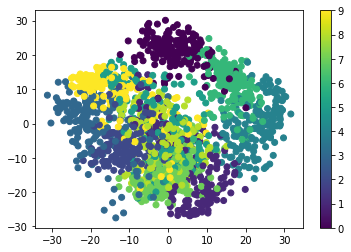

In [98]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)
plt.colorbar()

In [100]:
model.components_

array([[ 1.20079788e-17, -1.73094632e-02, -2.23428827e-01,
        -1.35913307e-01, -3.30323051e-02, -9.66340815e-02,
        -8.32943813e-03,  2.26900067e-03, -3.20516446e-04,
        -1.19308896e-01, -2.44451675e-01,  1.48512743e-01,
        -4.67319277e-02, -2.17740744e-01, -1.48136783e-02,
         4.47779530e-03, -4.94136200e-05, -7.95419290e-02,
         8.33951404e-02,  2.15915338e-01, -1.72126802e-01,
        -1.63712097e-01,  2.86444489e-02,  4.23251833e-03,
         9.85488611e-05,  6.42319167e-02,  2.54093320e-01,
        -3.56771030e-02, -2.09462580e-01, -4.31311315e-02,
         5.13118772e-02,  2.13422746e-04,  0.00000000e+00,
         1.59950882e-01,  3.68690781e-01,  1.64406839e-01,
         8.52007867e-02,  3.72982854e-02,  2.15866997e-02,
         0.00000000e+00,  1.28865585e-03,  1.06945282e-01,
         3.03067449e-01,  2.47813051e-01,  2.09637296e-01,
         1.22325218e-02, -3.69458508e-02,  1.61485027e-03,
         6.93023555e-04, -8.35144370e-03, -5.58599037e-0

In [101]:
model.components_.shape

(2, 64)

- Each component is a linear combinaison of the initial 64 Variables of our dataset.

# 2. Data compression :
- Minimize the size of the dataset while keeping 95-100% of the variance of your data. (High numbers of features = High Variance )

In [102]:
from sklearn.decomposition import PCA

# n_components : 
 #Number of dimension in which we want to project our data.
model=PCA(n_components=64)
#Transform our Data.
X_reduced=model.fit_transform(X)

In [104]:
# % Variance of each variable
model.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [107]:
#cumulative sum

np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

- model.explained_variance_ratio_ 
  - indicates the percentage of variance preserved by each component

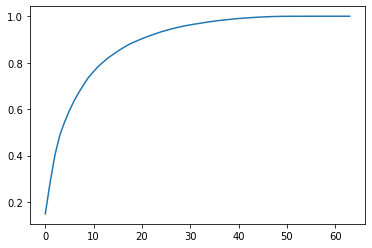

In [108]:


plt.plot(np.cumsum(model.explained_variance_ratio_))

In [ ]:
- The variance model is greather than 99% from the 40 ones main component.


In [111]:
np.argmax(np.cumsum(model.explained_variance_ratio_)>.99)

40

- So if we set n_components=40 , we have set the best dimension reduction to keep 99% of the dataset information.



In [123]:
from sklearn.decomposition import PCA

# n_components : 
 #Number of dimension in which we want to project our data.
model=PCA(n_components=40)
#Transform our Data.
X_reduced=model.fit_transform(X)

# Inverse : To see how they look like after the spliting

- 1 ) Decompress to recover Initial dimension.

- Initial Dimension :

In [124]:
X_recovered=model.inverse_transform(X_reduced)

In [125]:
X_recovered

array([[ 3.22434881e-15, -9.73888328e-03,  5.51716669e+00, ...,
        -2.81121448e-01, -6.07506899e-01,  5.04048390e-01],
       [-4.64267822e-16, -1.52476598e-01,  3.62234023e-01, ...,
         1.04230680e+01,  6.97590835e-02, -5.62596244e-01],
       [-3.10547370e-16,  1.70632643e-01, -4.22886554e-03, ...,
         1.56136036e+01,  8.48572302e+00,  1.21262050e+00],
       ...,
       [-3.06264679e-15, -2.97747812e-01,  1.43598349e+00, ...,
         5.93976018e+00, -1.88453251e-01, -2.76673844e-01],
       [ 2.45687663e-15, -1.21528764e-01,  4.12290707e+00, ...,
         1.19218246e+01,  5.19139586e-01,  1.26533180e-01],
       [-1.55349869e-15,  4.38550800e-01,  9.38225011e+00, ...,
         1.20490078e+01,  1.21759451e+00, -7.37774395e-01]])

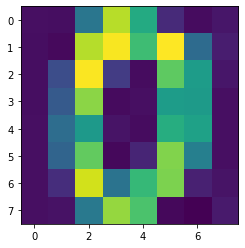

In [126]:
plt.imshow(X_recovered[0].reshape((8,8)))

# 8 high pixel , 8 pixel large  == 64 pixel

# Faster way : We can put the % of variance we need for the model in the n_component 

In [127]:
from sklearn.decomposition import PCA

# n_components : 
 #Number of dimension in which we want to project our data.
model=PCA(n_components=0.95)
#Transform our Data.
X_reduced=model.fit_transform(X)

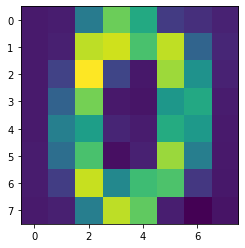

In [128]:
X_recovered=model.inverse_transform(X_reduced)
plt.imshow(X_recovered[0].reshape((8,8)))

In [130]:
model.n_components_

29

- We need 29  n_components to maintain 95 % variance.